# 아바타 2 물의길에 대한 감성 분석 및 리뷰 분석

## 1. 웹 파싱 및 데이터 수집

> # Part1 - 웹 서버 요청
    
    















In [22]:
# 네이버 영화 리뷰 request 받고 소스 코드 부분 확인 (https://movie.naver.com/movie/bi/mi/basic.naver?code=74977
import requests
import json

url = "https://movie.naver.com/movie/bi/mi/basic.naver?code=74977"

resp = requests.get(url)
resp #-> 200

resp.text[400:500]  #-> 소스 코드 출력 

'ttps://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg"/>\r\n<meta property="me2:post_tag" '

> # Part1 - HTML 파싱

In [23]:
#BeautifulSoup으로 HTML 해석 Beautifulsoup 모듈 필요 <- bs4 패키지에 있음 
from bs4 import BeautifulSoup as bs  #너무기니까 bs로 

soup = bs(resp.text, 'html.parser') #웹 파싱 
print(soup) #-> resp.text를 html형식으로 이쁘게 파싱 


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no" http-equiv="imagetoolbar"/>
<title>아바타: 물의 길 : 네이버 영화</title>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 아바타: 물의 길" property="me2:post_tag">
<meta content="네이버영화" property="me2:category1">
<meta content="아바타: 물의 길" property="me2:category2"/>
<meta content="아바타: 물의 길" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/bi/mi/basic.naver?code=74977" property="og:url"/>
<meta content="https://movie-phinf.pstatic.net/20221215_185/1671091761840XXpCR_JPEG/movie_image.jpg?type=m665_443_2" property="og:image"/>
<meta content="&lt;아바타: 물의 길&gt;은 판도라 행성에서'제이크 설리'와 '네이티리'가 이룬 가족이 겪게 되는 무자비한 위..." property="og:description"/>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="og:


> # Part2 - 데이터 수집


> #### 2-1. 영화제목 파싱
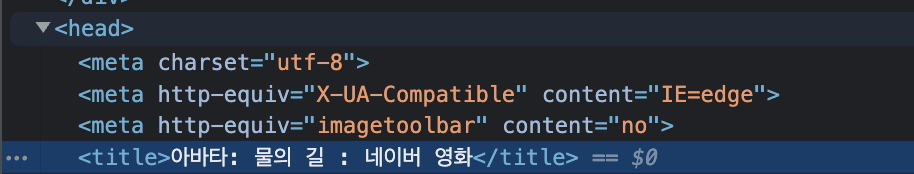

In [ ]:
# tag : <head> <title> 아바타 ~~~~~ 

#tag가지고 오기
title_tag = soup.find(name='title')
title_tag #-><title>아바타: 물의 길 : 네이버 영화</title>

#.get_text() 메소드로 제목만 추출
title_text =title_tag.get_text()
print(title_text)


> #### 2-2. 평점 개수 파싱

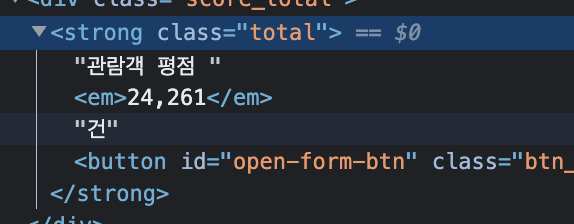


In [ ]:
# <div> <a> <em> 22,878 ~~~

#tag가지고 오기 em 태그의 class : u_cnt 를 활용해 태그 찾기 
count_tag = soup.find(name = 'strong', attrs={"class" : "total"})
count_tag = count_tag.find_all(name = 'em')
print("count_score : {}".format((count_tag[1]).get_text().strip())) #strip으로 공백제거해줘야함 



> #### 2- 3. 한줄평 파싱 

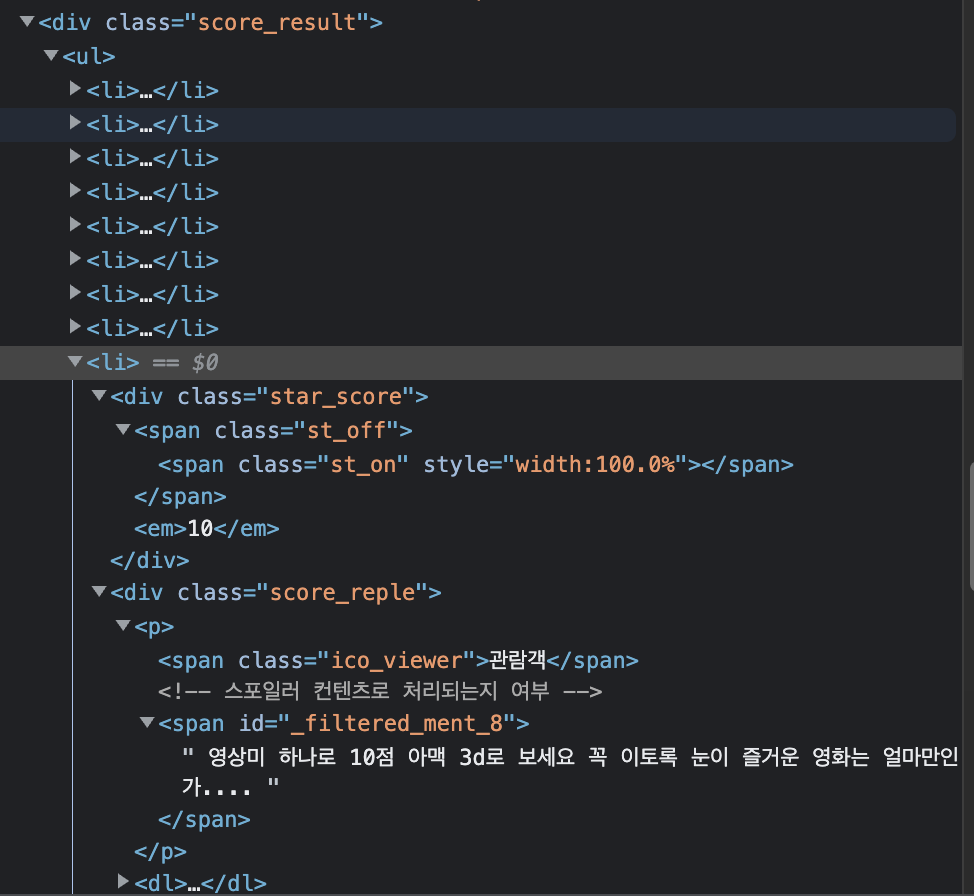

In [ ]:
# 한줄평 및 평점 파싱 body > div > div > div.score_result > ul > li:nth-child(9)

score_tag = soup.find(name='div', attrs={'class':'score_result'}, )

score_tags = score_tag.find_all(name='li')
print(score_tags[4])

In [ ]:
# 평점 점수 파싱 body > div > div > div.score_result > ul > li:nth-child(9) > div.star_score > em

score_stars = list()
for i in range(len(score_tags)):
    score_stars.append(score_tags[i].find(name = 'em').get_text().strip())
print(score_stars)


In [ ]:
# 한줄평 파심 div > div > div.score_result > ul > li:nth-child(9) > div.score_reple > p

score_reple = list()
for i in range(len(score_tags)):
    score_reple.append(score_tags[i].find(name='p').get_text().strip())
    
print(score_reple)

In [ ]:
#id 및 nid 파싱 body > div > div > div.score_result > ul > li:nth-child(1) > div.score_reple > dl > dt > em:nth-child(1) > a > span
import re 

score_nid = list()
score_id = list()
 
for i in range(len(score_tags)):
    nid = score_tags[i].find('a').get('onclick')    
    nid = re.findall('\d{7}',nid)[0]
    score_nid.append(nid)
    
    id = score_tags[i].find_all(name='span')[2]
    
    score_id.append(id.get_text())

print(f"nid : {score_nid}")
    
print(f"id : {score_id}")

> #### 2- 4. 리뷰 상세 페이지 탐색
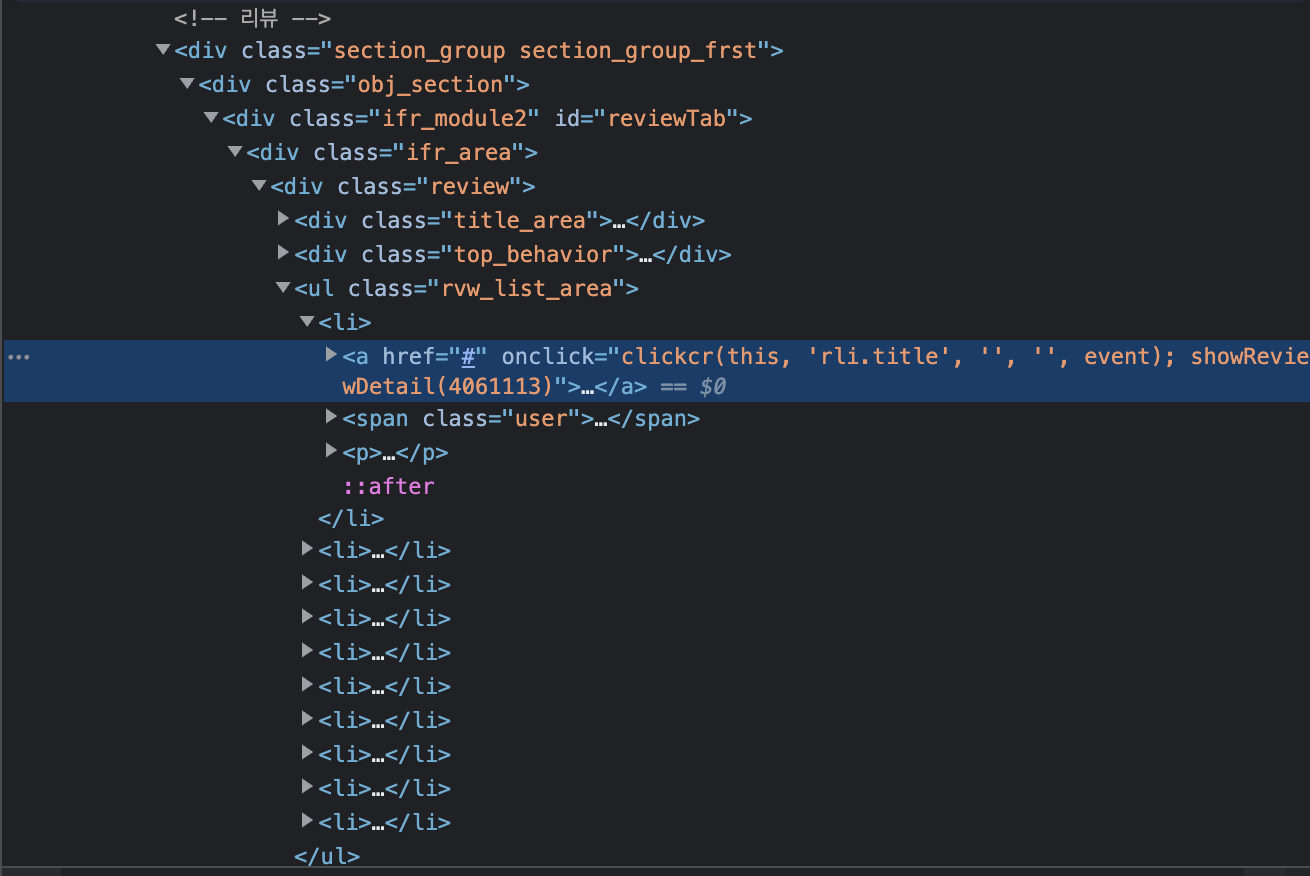

In [ ]:
# nid 값으로 사이트 들어가짐 https://movie.naver.com/movie/bi/mi/reviewread.naver?nid={nid값}&code=74977&order=#tab
import requests

#soup 변환해줘야함 이떄 우린 평점보고 있었으니 이번엔 리뷰사이트 url 가져오기 
review_url = "https://movie.naver.com/movie/bi/mi/review.naver?code=74977"

review_resp = requests.get(review_url)
review_soup = bs(review_resp.text, 'html.parser')
review_tag =review_soup.find(name = 'ul', attrs={'class': 'rvw_list_area'})
print(review_tag)
#-> ul제거
review_tags = review_tag.find_all(name='li')
print(len(review_tags)) 

# 각 리뷰 페이지로 연결된 nid값 포함하는 js 코드에서 nid값 추출 및 필요 콘텐츠 가지고오기  #reviewTab > div > div > ul > li:nth-child(1) > a
nid_list = list()
uid_list = list()
url_list = list() 
title_list =list() 
contents_list = list()
review_dict = dict()
for tag in review_tags:
    
    
    #title 찾기
    review_title = tag.find_all('a')[0].get_text()
    title_list.append(review_title)    
    
    #uid값 찾기
    review_uid = tag.find_all('a')[1].get_text()
    uid_list.append(review_uid)
    
    #nid값을 찾아서 url이랑 content 찾기
    #-1. nid값 찾기
    review_nid = tag.find('a').get('onclick') 
    nid = re.findall('\d{7}', review_nid)[0]
    nid_list.append(nid)
    #-2. url찾기
    review_url = f"https://movie.naver.com/movie/bi/mi/reviewread.naver?nid={nid}&code=74977&order=#tab"    
    url_list.append(review_url)
    #-3. contents찾기 
    resp_text =requests.get(review_url, headers = {'User-agent' : 'agent'})
    soup_text = bs(resp_text.text, 'html.parser') #-> html 소스코드 파싱 완료
    # 리뷰 본문 텍스트 추출
    review_text_tag = soup_text.find(name='div', attrs={'class':'user_tx_area'})
    review_text = review_text_tag.get_text() #텍스트 부분만 추출 
    contents_list.append(review_text.strip())
    





review_dict['review_uid'] = uid_list
review_dict['review_url'] = url_list
review_dict['review_title'] = title_list
review_dict['review_content'] = contents_list
    
    
    
#csv파일로 저장 
import pandas as pd 
df_data = pd.DataFrame(review_dict) 

In [ ]:
#결과값 저장 및 확인 
df_data.to_csv('./data/naver_review_Avatar2.csv')

df_data['review_content']

## 2. 자연어 데이터 전처리 및 모델링 실습

In [3]:
!conda install pandas

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::imageio==2.19.3=py39hecd8cb5_0
  - defaults/noarch::python-slugify==5.0.2=pyhd3eb1b0_0
  - defaults/osx-64::markdown==3.4.1=py39hecd8cb5_0
  - defaults/osx-64::smart_open==5.2.1=py39hecd8cb5_0
  - defaults/osx-64::mpmath==1.2.1=py39hecd8cb5_0
  - defaults/osx-64::pydocstyle==6.3.0=py39hecd8cb5_0
  - defaults/noarch::ptyprocess==0.7.0=pyhd3eb1b0_2
  - defaults/osx-64::panel==0.14.2=py39hecd8cb5_0
  - defaults/osx-64::jsonschema==4.16.0=py39hecd8cb5_0
  - defaults/osx-64::typing-extensions==4.4.0=py39hecd8cb5_0
  - defaults/noarch::jupyterlab_widgets==1.0.0=pyhd3eb1b0_1
  - defaults/noarch::yapf==0.31.0=pyhd3eb1b0_0
  - conda-forge/osx-64::jpype1==1.4.1=py39h92daf61_1
  - defaults/osx-64::tqdm==4.64.1=py39hecd8cb5_

In [6]:
#라이브러리 불러오기 
import pandas as pd
import numpy as np

import os, re
from tqdm import tqdm

# 경고문구 미표시
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [8]:
# 네이버 영화 리뷰 데이터 트레이닝 셋 다운 
# 출처 : https://github.com/e9t/nsmc

# 다운로드 받을 폴더를 준비
DATA_DIR = "./data/"
os.makedirs(DATA_DIR, exist_ok=True)

#데이터 다운 
# 데이터 다운로드 
import torchtext 
torchtext.utils.download_from_url(url='https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', 
                                  path=os.path.join(DATA_DIR, 'review.txt'))

# txt 파일을 판다스 데이터프레임으로 읽어오기
data = pd.read_csv('./data/review.txt', sep='\t')

# 데이터프레임의 크기
print(data.shape)

# 첫 5행을 출력
data.head()

(150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


> # Part2 - 형태소 분석
 *KoNLPy(코엔엘파이) 활용해 토큰으로 분리 


In [9]:
# 트위터 형태소 분석기(Okt)를 활용
from konlpy.utils import pprint
from konlpy.tag import Okt
okt = Okt()
print(okt)

In [10]:
# 긍정 리뷰를 하나 선택
sample_text = data['document'].iloc[149978]
print(type(sample_text))
print(sample_text)

<class 'str'>
그리 만족스럽진못했어도 7점은 나와야되는것같아 10점줌. 주인공들연기도 훌륭했고 내용도 이정도면 괜찮았다. 해피엔딩으로끝났으면 그저 진부한영화가 되버릴뻔. 그래도 엔딩이 섭섭한건 없지않아있었음. 킬러들의도시도그렇고 콜린파렐을 너무 축축하게 끝내버리는듯


In [11]:
##test 

# (단어, 품사) 추출 단어 : okt.morphs(data) 명사 : okt.nouns(data) 
tokens = okt.nouns(sample_text)
pprint(tokens)

['점',
 '점줌',
 '주인공',
 '기도',
 '내용',
 '정도',
 '해피엔딩',
 '영화',
 '뻔',
 '엔딩',
 '킬러',
 '도시',
 '콜린파렐',
 '끝내']


In [12]:
# 텍스트 전처리 
#누락 데이터 제거
review_data = data['document'].dropna().values 

#학습 속도 고려해 3000개 샘플 추출 
review_data =review_data[:1000]


#배열크기 
print(review_data.shape)
#마지막 단어 추출 -> 데이터 뒤로갈수록 긍정 
print(review_data[-1])

(1000,)
남자 주인공 늑대 인간으로 변하고 끝나네유. 평점 보고 안 볼까 하다가 봤는디 재밌네유. CG보다 이런 실물 특수 효과가 더 보는 재미가 있어유. 웃기기까지 하네유. 근디 제목 번역은 어느 바보가 한거여. 그냥 늑대 인간이 아니잖여.


In [13]:
# 세글자 이상 명사 추출 
cleaned_review_data = [] 
for review in tqdm(review_data[:200]):
    tokens = okt.nouns(review) #token을 명사로 지정 
    cleaned_tokens = [] 
    for word in tokens:
        if len(word) >= 3:
            cleaned_review_data.append(word)
        else:
            pass #-> 없으면 다음 명사로 ㄱㄱ 
    cleaned_review = " ".join(tokens)
    cleaned_review_data.append(cleaned_review)

print(len(cleaned_review_data))
print(cleaned_review_data[0])
    

100%|██████████| 200/200 [00:00<00:00, 216.64it/s]

396
목소리


In [14]:
type(cleaned_review_data)

list

> # Part2 - 벡터화 표현


In [36]:

# 사이킷런 패키지 활용 
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환기 객체를 생성
tfid = TfidfVectorizer()

# TF-IDF 변환기에 데이터를 입력하여 변환
review_tfid = tfid.fit_transform(cleaned_review_data)

# 배열의 크기
print(review_tfid.shape)

# 첫 번째 데이터
print(review_tfid[0])

(396, 599)
  (0, 175)	1.0


In [37]:
# 단어사전 확인 (딕셔너리 형태 )
vocab = tfid.vocabulary_

# 단어 사전의 크기
print(len(vocab))

# 단어 사전 출력 (앞에서 5개의 단어만 출력)
print({ k:v for i, (k, v) in enumerate(vocab.items()) if i < 5 })

599
{'목소리': 175, '더빙': 120, '진짜': 494, '포스터': 556, '보고': 225}


In [38]:
# 첫 번째 리뷰를 구성하는 단어들의 사전 인덱스를 이용하여 원래 단어를 복원 (순서 복원 X)
original_text = " ".join([index_to_word[word_idx] for word_idx in review_tfid[0].indices])
original_text

'목소리'

> # Part2 - 토픽 모델링


In [39]:
# 사이킷런 패키지 활용
from sklearn.decomposition import LatentDirichletAllocation

# LDA 모델링 객체를 생성 (토픽 갯수를 2로 설정: 긍정/부정)
lda = LatentDirichletAllocation(2)  

# TF-IDF 벡터를 입력하여 모델 학습 
lda.fit(review_tfid)

LatentDirichletAllocation(n_components=2)

In [40]:
# 토픽 모델링 결과를 담고 있는 배열의 형태 : (2개의 토픽, 2157개의 단어)
print(lda.components_.shape)

(2, 599)


In [54]:
# 2157개의 단어 중에서, 토픽 별로 가장 중요도가 높은 단어를 10개씩 출력

for idx, topic in enumerate(lda.components_):
    print(f"토픽 유형 {idx+1}:", [(index_to_word[i], topic[i].round(3)) for i in topic.argsort()[:-11:-1]])

토픽 유형 1: [('드라마', 10.5), ('스토리', 6.204), ('쓰레기', 5.327), ('진짜', 4.768), ('캐스팅', 4.694), ('아햏햏', 4.479), ('이야기', 4.32), ('어린이', 3.299), ('발연기', 3.294), ('목소리', 3.285)]
토픽 유형 2: [('영화', 19.326), ('주인공', 5.493), ('최고', 5.082), ('정말', 4.417), ('제대로', 3.652), ('포스터', 3.562), ('전개', 3.389), ('긴장감', 3.357), ('절대', 3.058), ('도대체', 2.972)]


pyLDAvis 설치
!pip install pyLDAvis

In [55]:
# LDA 토픽 모델링 결과를 시각화
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
visualization = pyLDAvis.sklearn.prepare(lda, review_tfid, tfid)
pyLDAvis.display(visualization)

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

## 3. 분석 및 결과 보고서 

> # Part2 - 감성 분석


In [43]:
# 긍정, 부정 감성 분류
labels = data['label'].iloc[:1000].values
print(labels.shape)
print(labels[:5])


(1000,)
[0 1 0 0 1]


In [48]:
# 사이킷런 패키지 활용
from sklearn.linear_model import LogisticRegression

# 로지스틱 분류 모델링 객체를 생성 
lr = None

# TF-IDF 벡터를 입력하여 모델 학습 
lr.fit(review_tfid, labels)

AttributeError: 'NoneType' object has no attribute 'fit'

In [47]:
# 첫 번째 샘플을 이용하여 모델 예측
pred = lr.predict(review_tfid[0])
print(pred)

AttributeError: 'NoneType' object has no attribute 'predict'